In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import torch
import numpy as np
from torch import nn
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler,LabelEncoder,MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPRegressor
import seaborn as sns

In [2]:
# 构建历史数据集
def create_history_dataset(X, m):
    history_data = []
    for i in range(len(X) - m + 1):
        history_data.append(X[i:i+m])
    return np.array(history_data)

In [3]:
# 读取训练数据
train_input = pd.read_csv('/kaggle/input/task1-dataset/train_input_data.csv', header=None)
train_output = pd.read_csv('/kaggle/input/task1-dataset/train_output_data.csv', header=None)

# 读取测试数据
test_input = pd.read_csv('/kaggle/input/task1-dataset/test_input_data.csv', header=None)
test_output = pd.read_csv('/kaggle/input/task1-dataset/test_output_data.csv', header=None)

In [4]:
train_input_complex = train_input.iloc[:, 0] + 1j * train_input.iloc[:, 1]
train_output_complex = train_output.iloc[:, 0] + 1j * train_output.iloc[:, 1]
train_input_amplitude = np.abs(train_input_complex)
train_output_amplitude = np.abs(train_output_complex)

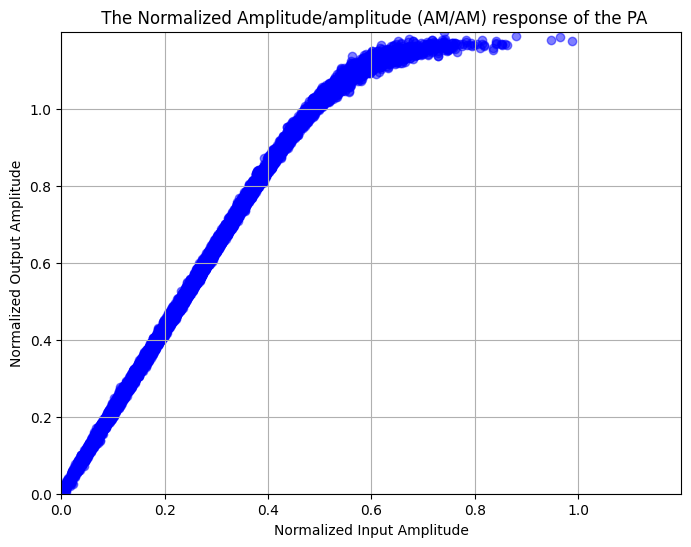

In [5]:
plt.figure(figsize=(8, 6))
plt.scatter(train_input_amplitude, train_output_amplitude, color='blue', alpha=0.5)
plt.title(' The Normalized Amplitude/amplitude (AM/AM) response of the PA')
plt.xlabel('Normalized Input Amplitude')
plt.ylabel('Normalized Output Amplitude')
plt.xlim(0, max(train_input_amplitude.max(), train_output_amplitude.max()))
plt.ylim(0, max(train_input_amplitude.max(), train_output_amplitude.max()))
plt.grid(True)
plt.savefig("1.png")
plt.show()

In [6]:
X_train = train_input.iloc[:,:]
X_test = test_input.iloc[:,:]
X_train_real = train_input.iloc[:,0]
X_train_imag = train_input.iloc[:,1]
X_test_real = test_input.iloc[:,0]
X_test_imag = test_input.iloc[:,1]
y_train = train_output.iloc[:,:]
y_test = test_output.iloc[:,:]
model = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=500)

In [7]:
def run_model(m, nmse, model):
    sc=MinMaxScaler()
    X_train = train_input.iloc[:,:]
    X_test = test_input.iloc[:,:]
    X_train_real = train_input.iloc[:,0]
    X_train_imag = train_input.iloc[:,1]
    X_test_real = test_input.iloc[:,0]
    X_test_imag = test_input.iloc[:,1]
    y_train = train_output.iloc[:,:]
    y_test = test_output.iloc[:,:]
    y_train_real = train_output.iloc[m-1:len(train_output),0].values
    y_train_imag = train_output.iloc[m-1:len(train_output),1].values
    y_test_real = test_output.iloc[m-1:len(test_output),0].values
    y_test_imag = test_output.iloc[m-1:len(test_output),1].values
    num_features = 2
    X_train_history = create_history_dataset(X_train.values,m)
    X_test_history= create_history_dataset(X_test.values,m)
    y_train_history = train_output.iloc[m-1:len(train_output),:]
    y_test_history = test_output.iloc[m-1:len(test_output),:]
    X_train_history_scaled = sc.fit_transform(X_train_history.reshape(X_train_history.shape[0], m * num_features))
    X_test_history_scaled = sc.fit_transform(X_test_history.reshape(X_test_history.shape[0], m * num_features))
    model.fit(X_train_history_scaled,y_train_history)
    y_pred = model.predict(X_test_history_scaled)
    NMSE = 10 * np.log10((np.sum((y_test_real-y_pred[:,0])**2) + np.sum((y_test_imag-y_pred[:,1])**2)) /
                     (np.sum(y_test_real**2) + np.sum(y_test_imag**2)))
    print("记忆深度：",m,"归一化均方误差：",NMSE)
    nmse.append(NMSE)
    return nmse

In [8]:
NMSE = []
for m in range(1, 100):
    NMSE = run_model(m, NMSE, model)

记忆深度： 1 归一化均方误差： -13.062807793548137
记忆深度： 2 归一化均方误差： -13.002589932479076
记忆深度： 3 归一化均方误差： -13.103329085191824
记忆深度： 4 归一化均方误差： -13.069590277231091
记忆深度： 5 归一化均方误差： -13.010925474196426
记忆深度： 6 归一化均方误差： -13.023600279862649
记忆深度： 7 归一化均方误差： -12.819072452258549
记忆深度： 8 归一化均方误差： -13.063378684161307
记忆深度： 9 归一化均方误差： -13.40648782896249
记忆深度： 10 归一化均方误差： -13.00300368202781
记忆深度： 11 归一化均方误差： -13.405850391253264
记忆深度： 12 归一化均方误差： -13.09428300950572
记忆深度： 13 归一化均方误差： -12.771747205822521
记忆深度： 14 归一化均方误差： -13.959889600439364
记忆深度： 15 归一化均方误差： -13.123281095570398
记忆深度： 16 归一化均方误差： -12.896810940565269
记忆深度： 17 归一化均方误差： -13.686870110522339
记忆深度： 18 归一化均方误差： -13.034438732028672
记忆深度： 19 归一化均方误差： -12.195535765627088
记忆深度： 20 归一化均方误差： -14.18860241372405
记忆深度： 21 归一化均方误差： -14.112680130826389
记忆深度： 22 归一化均方误差： -12.61253861087446
记忆深度： 23 归一化均方误差： -13.046085014334318
记忆深度： 24 归一化均方误差： -12.247999303576169
记忆深度： 25 归一化均方误差： -13.688646811635042
记忆深度： 26 归一化均方误差： -12.44488748254533
记忆深度： 27 归一化均方误差： -11.46446

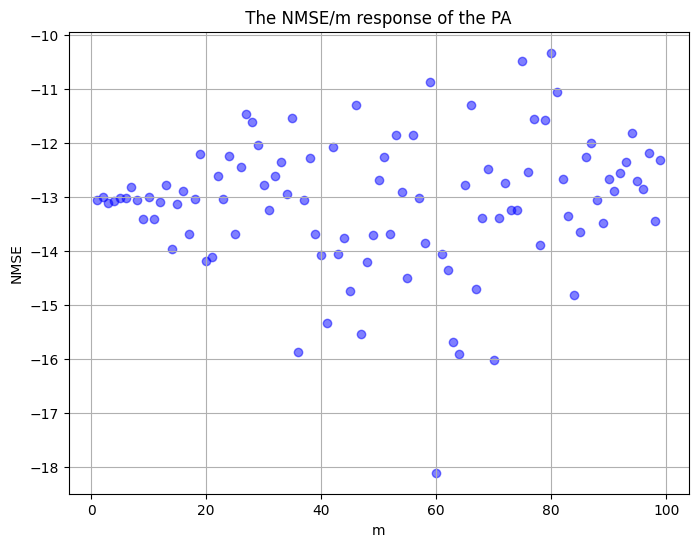

In [9]:
plt.figure(figsize=(8, 6))
plt.scatter(range(1,100), NMSE, color='blue', alpha=0.5)
plt.title(' The NMSE/m response of the PA ')
plt.xlabel('m')
plt.ylabel('NMSE')
plt.grid(True)
plt.savefig("2.png")
plt.show()

In [10]:
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
NMSE = 10 * np.log10((np.sum((y_test.iloc[:,0]-y_pred[:,0])**2) + np.sum((y_test.iloc[:,1]-y_pred[:,1])**2)) /
                     (np.sum(y_test.iloc[:,0]**2) + np.sum(y_test.iloc[:,1]**2)))
print("归一化均方误差：",NMSE)

归一化均方误差： -34.062018903749134
